In [1]:
#Import libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Generate random data
center1=[1,1]
center2=[5,4]
center3=[9,1]

data1= np.random.randn(50,2) + center1
data2= np.random.randn(50,2) + center2
data3= np.random.randn(50,2) + center3

data = np.concatenate((data1, data2, data3), axis=0)
data = data.tolist()

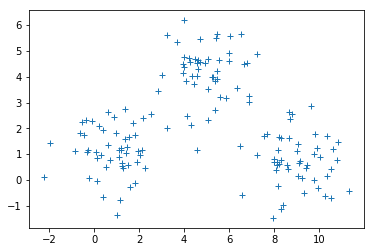

In [3]:
#Plot data
data_x = [x[0] for x in data]
data_y = [x[1] for x in data]

plt.plot(data_x, data_y, '+')

In [4]:
#Number of clusters
k = 3

#Number of data
n=len(data)

#Number of features
c = len(data[0])

print("Number of clusters: ", k)
print("Number of data: ", n)
print("Number of features: ", c)

Number of clusters:  3
Number of data:  150
Number of features:  2


In [5]:
#Pick k random points as centroids
centroid_list= []

while len(centroid_list)<k:
    #Pick a random element for data
    random_centroid = random.choice(data)
    
    if random_centroid not in centroid_list:
        centroid_list.append(random_centroid)
        
print("Centroids: ", centroid_list)

Centroids:  [[1.4780631558026651, 1.2731394735471824], [0.1352161613823344, 0.8648307484155273], [7.926514640383111, -1.4716441067986583]]


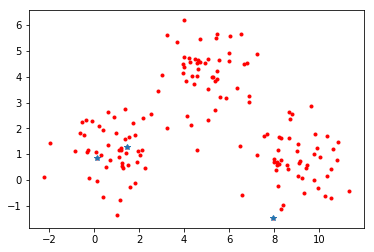

In [6]:
#Plot data
centroid_x = [x[0] for x in centroid_list]
centroid_y = [x[1] for x in centroid_list]

plt.plot(data_x, data_y, 'r.')
plt.plot(centroid_x, centroid_y, '*')

In [7]:
#data[0] and centroid_list[0]
data_labels = [0]*len(data)

#Iterate over all data with index_data
for index_data in range(n):
    min_distance = 0
    #Iterate over all centroid with index_centroid
    for index_centroid in range(k):
        distance = 0
        #Iterate over all feature with index_feature
        for index_feature in range(c):
            distance += (data[index_data][index_feature]- centroid_list[index_centroid][index_feature])**2.0
        distance = distance**0.5
        #Assign the nearest centroid by computing its distance to the centroid
        if distance < min_distance or min_distance == 0:
            data_labels[index_data] = index_centroid
            min_distance = distance
error_distance = 0
for index_centroid in range (k):
    for index_feature in range (c):
        data_centroid_feature = [point_coordinate[index_feature] for point_coordinate, label in zip(data, data_labels) if label==index_centroid]
        feature_mean = sum(data_centroid_feature)/len(data_centroid_feature)
        error_distance += (centroid_list[index_centroid] [index_feature] - feature_mean)**2
        centroid_list[index_centroid] [index_feature] = feature_mean
print(data_labels)

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
